<a href="https://colab.research.google.com/github/thiagopereira1904/thiago_datascience/blob/main/CCSA_Univariate_Analysis_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.family'] = 'sans-serif'
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [126]:
# Carregado a base de dados
application_record = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Credit Score Approval/data/application_record.csv')
credit_record = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Credit Score Approval/data/credit_record.csv')

In [127]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.00000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00000
1,5008805,M,Y,Y,0,427500.00000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00000
2,5008806,M,Y,Y,0,112500.00000,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00000
3,5008808,F,N,Y,0,270000.00000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00000
4,5008809,F,N,Y,0,270000.00000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00000


In [128]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# Análise Exploratória

In [129]:
# Informações da base de dados de informações cadastrais
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [130]:
# Porcentagem de valores nulos
application_record.isnull().sum() / application_record.shape[0]

ID                    0.00000
CODE_GENDER           0.00000
FLAG_OWN_CAR          0.00000
FLAG_OWN_REALTY       0.00000
CNT_CHILDREN          0.00000
AMT_INCOME_TOTAL      0.00000
NAME_INCOME_TYPE      0.00000
NAME_EDUCATION_TYPE   0.00000
NAME_FAMILY_STATUS    0.00000
NAME_HOUSING_TYPE     0.00000
DAYS_BIRTH            0.00000
DAYS_EMPLOYED         0.00000
FLAG_MOBIL            0.00000
FLAG_WORK_PHONE       0.00000
FLAG_PHONE            0.00000
FLAG_EMAIL            0.00000
OCCUPATION_TYPE       0.30601
CNT_FAM_MEMBERS       0.00000
dtype: float64

In [131]:
# Informações da base que contém o score de cada cliente
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [132]:
# Porcentagem de valores nulos
credit_record.isnull().sum() / credit_record.shape[0]

ID               0.00000
MONTHS_BALANCE   0.00000
STATUS           0.00000
dtype: float64

In [133]:
# Verificando se há clientes repetidos
marca_repetido = application_record.duplicated(subset="ID", keep='last')
# Pegando indîces que são valores repetidos
row_repetidas = marca_repetido[marca_repetido].index
# Deletando valores repetidos
application_record.drop(index=row_repetidas, inplace=True)
# Ordenando para pegar o score mais recente e dropando scores antigos para cada cliente
credit_record1 = credit_record.sort_values(by=['ID', 'MONTHS_BALANCE'], ascending=False).drop_duplicates(subset='ID', keep='first')
# Merge das bases info com score para consolidação
df = application_record.merge(credit_record1, on='ID')

## Análise das variáveis categóricas

### Análise das variáveis binárias

In [134]:
# Função para plotar os rótulos dos eixos
def func(pct):
    return "{:.0f}%".format(pct)
# Função para plotar o gráfico
def plota_bin(series, lista_labels, titulo, pallete=None, comentario=None):
    plt.figure(figsize=(6, 3.7))
    plt.title(titulo)
    plt.pie(series, wedgeprops=dict(width=.5), colors=pallete,autopct=lambda pct: func(pct), 
            pctdistance=.7, textprops={'color':'white'}, shadow=True, explode=[.04, 0])
    plt.text(1, .3, comentario)
    plt.legend(lista_labels, bbox_to_anchor=(0, .7))
    plt.tight_layout()
    return plt.show()

def plota_barplot(series, titulo, pallete=None):
    fig, ax = plt.subplots(figsize=(7, 4.7))
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.title(titulo, loc='left')
    g=sns.barplot(x=series.values, y=series.index)
    rects = ax.patches
    # Make some labels.
    y = series.index
    labels = series.values
    for label, rect in zip(labels, rects):
        plt.text(label + .004, (rect.get_y() + .5), "{:.2f}%".format(label * 100))
    plt.xticks([])
    plt.tight_layout()
    plt.show()

#### Variável CODE_GENDER (gênero)

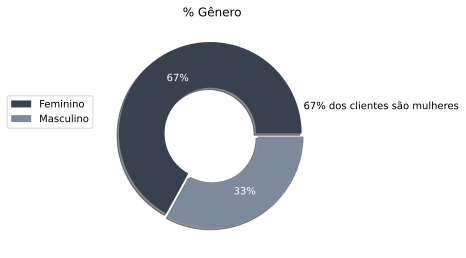

In [135]:
# Calculando a porcentagem para cada gênero
c_gender = df.CODE_GENDER.value_counts() / df.shape[0]
# Plotando o gráfico
plota_bin(c_gender, ['Feminino', 'Masculino'], '% Gênero', ['#38414E','#7D8A9C'], """67% dos clientes são mulheres""")

#### Variável NAME_FAMILY_STATUS (estado cívil)

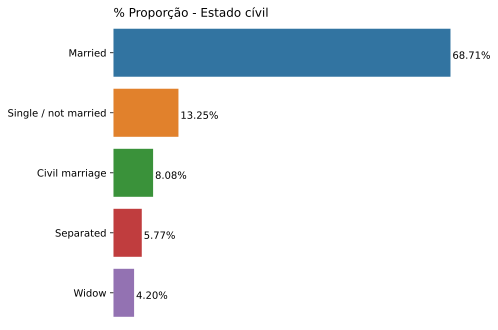

In [136]:
name_family_st = df.NAME_FAMILY_STATUS.value_counts() / df.shape[0]
plota_barplot(name_family_st, '% Proporção - Estado cívil')

#### Variável NAME_INCOME_TYPE (tipo da renda atual)

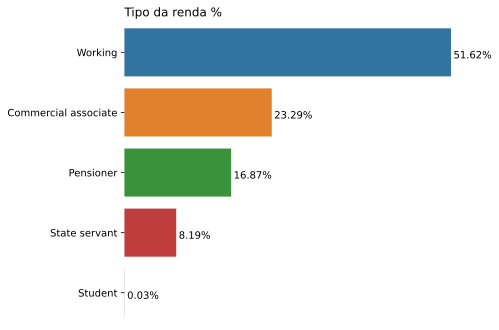

In [137]:
name_income_type = df.NAME_INCOME_TYPE.value_counts() / df.shape[0]
plota_barplot(name_income_type, 'Tipo da renda %')

#### Variável NAME_EDUCATION_TYPE (tipo da educação)

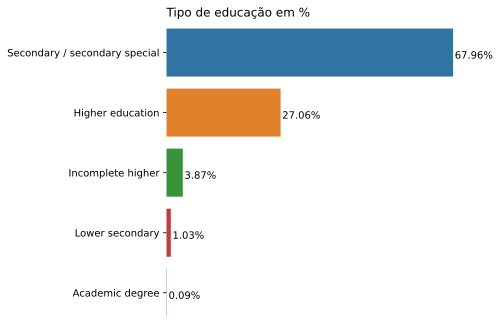

In [138]:
NAME_EDUCATION_TYPE = df.NAME_EDUCATION_TYPE.value_counts() / df.shape[0]
plota_barplot(NAME_EDUCATION_TYPE, 'Tipo de educação em %')

#### Variável OCCUPATION_TYPE (profissão)

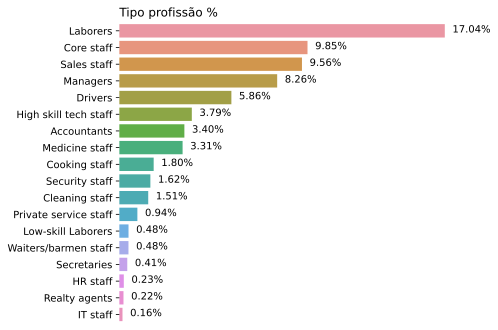

In [139]:
occupation_type = df.OCCUPATION_TYPE.value_counts() / df.shape[0]
plota_barplot(occupation_type, 'Tipo profissão %')

#### Variável FLAG_OWN_REALTY (possui propriedade)

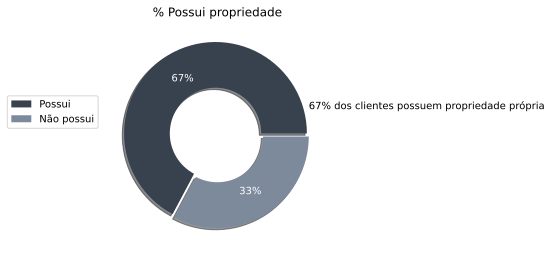

In [140]:
# Calculando a porcentagem para sim e não
own_realty = df.FLAG_OWN_REALTY.value_counts() / df.shape[0]
# Plotando o gráfico
plota_bin(own_realty, ['Possui', 'Não possui'], '% Possui propriedade', ['#38414E','#7D8A9C'], """67% dos clientes possuem propriedade própria""")

#### Variável NAME_HOUSING_TYPE (tipo da moradia atual)

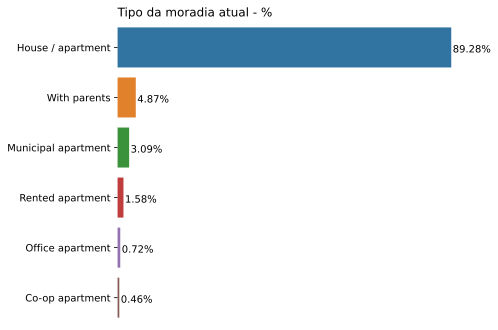

In [141]:
name_house_type = df.NAME_HOUSING_TYPE.value_counts() / df.shape[0]
plota_barplot(name_house_type, 'Tipo da moradia atual - %')

#### Variável FLAG_OWN_CAR (possui carro)

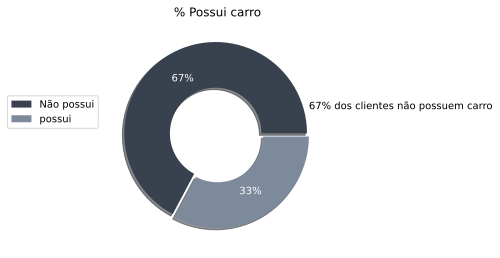

In [142]:
own_car = df.FLAG_OWN_CAR.value_counts() / df.shape[0]
plota_bin(own_realty, ['Não possui', 'possui'], '% Possui carro', ['#38414E','#7D8A9C'], """67% dos clientes não possuem carro""")

#### Variável FLAG_WORK_PHONE (celular para trabalho)

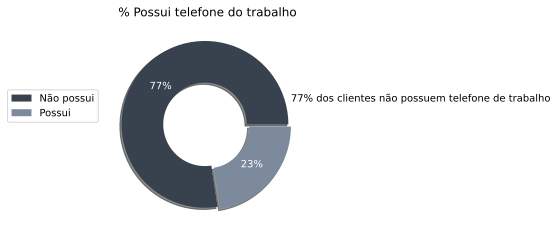

In [143]:
FLAG_WORK_PHONE = df.FLAG_WORK_PHONE.value_counts() / df.shape[0]
plota_bin(FLAG_WORK_PHONE, ['Não possui', 'Possui'], '% Possui telefone do trabalho', ['#38414E','#7D8A9C'], """77% dos clientes não possuem telefone de trabalho""")

#### Variável FLAG_PHONE (possui celular pessoal)

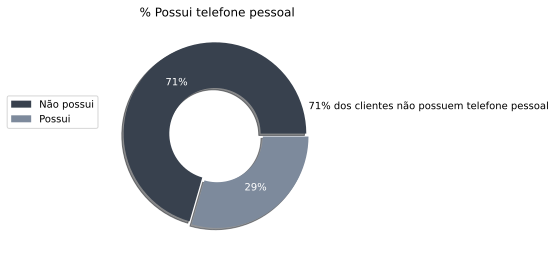

In [144]:
FLAG_PHONE = df.FLAG_PHONE.value_counts() / df.shape[0]
plota_bin(FLAG_PHONE, ['Não possui', 'Possui'], '% Possui telefone pessoal', ['#38414E','#7D8A9C'], """71% dos clientes não possuem telefone pessoal""")

#### Variável FLAG_EMAIL (possui e-mail)

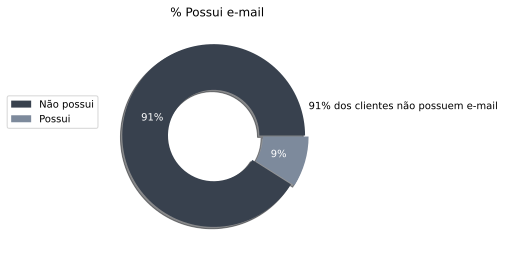

In [145]:
FLAG_EMAIL = df.FLAG_EMAIL.value_counts() / df.shape[0]
plota_bin(FLAG_EMAIL, ['Não possui', 'Possui'], '% Possui e-mail', ['#38414E','#7D8A9C'], """91% dos clientes não possuem e-mail""")

#### Variável STATUS (informa dias de atraso do cliente)
0: 1-29 dias de atraso; <br>
1: 30-59 dias de atraso; <br>
2: 60-89 dias de atraso; <br>
3: 90-119 dias de atraso; <br>
4: 120-149 dias de atraso; <br>
5: Atraso ou débitos, por mais de 150 dias<br>
C: Pagou no mês; <br>
X: Sem emprestimo para o mês;

In [146]:
df.STATUS.unique()

array(['C', '0', 'X', '1', '5', '3', '4', '2'], dtype=object)

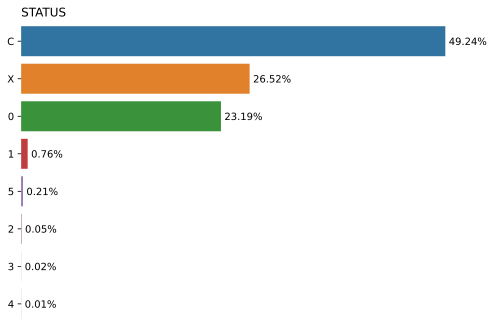

In [147]:
status = df.STATUS.value_counts() / df.shape[0]
plota_barplot(status, 'STATUS')

<b>Conclusão:</b> Obersvando as análises das variáveis categóricas, foi possivel descobrir algumas particularidades dos clientes presentes na base de dados em questão.<br>
A maioria dos clientes são mulheres;<br>
Mais de 60% dos clientes são casados;<br>
Para obter sua renda, 50% dos clientes estão trabalhando em empresas privadas, ou tem outra profissão com menor representatividade na base.;<br>
68% dos clientes tem apenas secondary special education (nível para mercado de trabalho sem estudos aprofundados);<br>
17% dos clientes são operários, tem outros tipos de profissões presentes na base, seria possível estudar os perfis desses clientes e tentar entender produtos/serviços que melhor o atenderia;<br>
A maioria dos clientes tem propriedade própria e moram em casa ou apartamentos;<br>
Mais de 60% dos clientes não possuem carro;<br>
Mais de 50% dos clientes não tem como características, ter celular pessoal ou para trabalho, ou e-mail; <br>
49% dos clientes pagam empréstimos em dia;

## Análise das variáveis numéricas

In [148]:
# Plota gráfico estatísticos
def plot_stats(column, showfliers=True):
  fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
  ax[0].hist(df[column])
  ax[1].boxplot(df[column], showfliers=showfliers)
  plt.tight_layout()
  return plt.show()

# Remove outliers usando intervalo
def remove_outliers_iqr(serie):
  q1 = serie.quantile(.25)
  q3 = serie.quantile(.75)
  iqr = q3 - q1
  low_range = q1 - (1.5 * iqr)
  up_range = q3 + (1.5 * iqr)
  return low_range, up_range

#### Variável DAYS_BIRTH (dias nascimento)

In [149]:
# Transformando idade em anos
df['DAYS_BIRTH'] = (df.DAYS_BIRTH) / -365
# Renomeando a variável
df.rename(columns={'DAYS_BIRTH': 'IDADE'}, inplace=True)

In [150]:
# Resumos estatísticos
df.IDADE.describe()

count   36457.00000
mean       43.76760
std        11.50836
min        20.51781
25%        34.14247
50%        42.63836
75%        53.25479
max        68.90959
Name: IDADE, dtype: float64

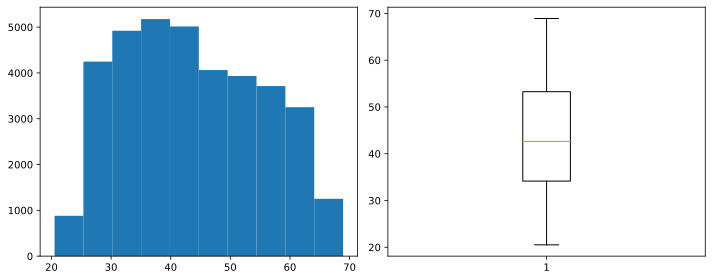

In [151]:
# Plotando a distribuição da variável
plot_stats('IDADE')

Os clientes presentes na base, tem idades entre 20 e 70 anos.<br> E em média a idade dos clientes é de 42 anos.

#### Variável AMT_INCOME_TOTAL (renda anual)

In [152]:
df.AMT_INCOME_TOTAL.describe()

count     36457.00000
mean     186685.73666
std      101789.22648
min       27000.00000
25%      121500.00000
50%      157500.00000
75%      225000.00000
max     1575000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

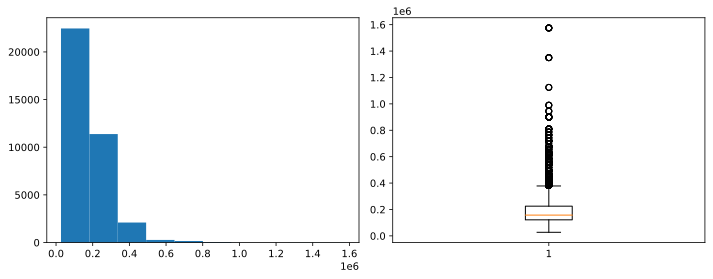

In [153]:
plot_stats('AMT_INCOME_TOTAL')

É possível observar a presenças de valores outliers nesta variável, em futuras análises mais aprofundadas, estes valores podem envieasar o estudo.<br>
Irei substituir os valores outliers pela média.

In [154]:
# Obtendo low range e upper range para definir limites nos dados (removendo outiliers)
_, upper_range = remove_outliers_iqr(df.AMT_INCOME_TOTAL)
df.loc[(df.AMT_INCOME_TOTAL > upper_range), 'AMT_INCOME_TOTAL'] = df.AMT_INCOME_TOTAL.mean()

In [155]:
df.AMT_INCOME_TOTAL.describe()

count    36457.00000
mean    173326.83287
std      69773.34906
min      27000.00000
25%     121500.00000
50%     157500.00000
75%     225000.00000
max     378000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

Os clientes, em média, tem um renda anual de 169.904,15 USD.

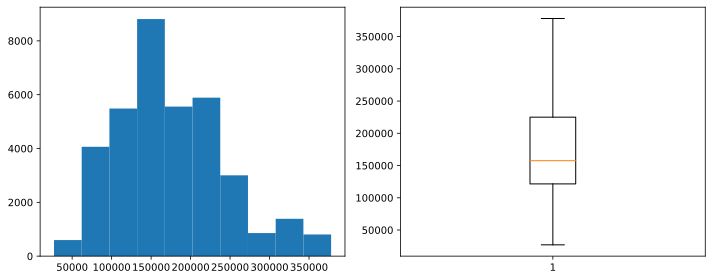

In [156]:
plot_stats('AMT_INCOME_TOTAL')

#### Variável CNT_CHILDREN (qtd de filhos/crianças)

In [157]:
df.CNT_CHILDREN.describe(percentiles=[.99])

count   36457.00000
mean        0.43032
std         0.74237
min         0.00000
50%         0.00000
99%         3.00000
max        19.00000
Name: CNT_CHILDREN, dtype: float64

Aqui tem outliers, dado que a probabilidade de uma pessoa ter 19 filhos é baixa.

In [158]:
# Calculando a faixa de corte para identificar os outliers usando iqr
_, upper_range = remove_outliers_iqr(df.CNT_CHILDREN)
# Substituindo os valores outliear pela média
df.loc[(df.CNT_CHILDREN >= upper_range), 'CNT_CHILDREN'] = df.CNT_CHILDREN.mean()

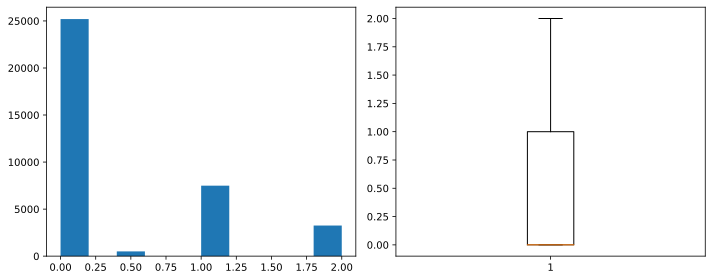

In [159]:
plot_stats('CNT_CHILDREN')

Em média, os clientes não tem filhos.

#### Variável DAYS_EMPLOYED (dias empregado)

In [160]:
df.DAYS_EMPLOYED.describe(percentiles=[.99])

count    36457.00000
mean     59262.93557
std     137651.33486
min     -15713.00000
50%      -1552.00000
99%     365243.00000
max     365243.00000
Name: DAYS_EMPLOYED, dtype: float64

Dias corridos que o cliente está trabalhando, se > 0, o cliente está atualmente desempregado. <br>
Vou tranformar os dias em anos e criar uma variável binário indicando se está trabalhando ou está desempregado.

In [161]:
# Encontrei dados sem integridade/qualidade, para valores >= 0 só tem um valor constante para todos os registros,
# não tem como saber quantos anos o cliente está desempregado. 
# Por este motivo, vou transformar esta variável em binária, onde 1 indica que está trabalhando e 0 despregado.
# Criando flag_empregado
df['FLAG_EMPREGADO'] = 0
df.loc[df.DAYS_EMPLOYED < 0, 'FLAG_EMPREGADO'] = 1
df.loc[df.DAYS_EMPLOYED >= 0, 'FLAG_EMPREGADO'] = 0

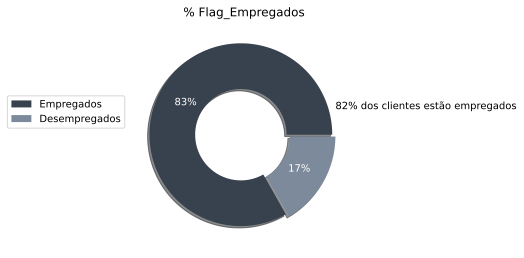

In [162]:
FLAG_EMPREGADO = df.FLAG_EMPREGADO.value_counts()/df.shape[0]
plota_bin(FLAG_EMPREGADO, ['Empregados', 'Desempregados'], titulo='% Flag_Empregados', pallete=['#38414E','#7D8A9C'], comentario="""82% dos clientes estão empregados""")

#### Variável CNT_FAM_MEMBERS (número de pessoas na família)

In [163]:
df.CNT_FAM_MEMBERS.describe()

count   36457.00000
mean        2.19845
std         0.91169
min         1.00000
25%         2.00000
50%         2.00000
75%         3.00000
max        20.00000
Name: CNT_FAM_MEMBERS, dtype: float64

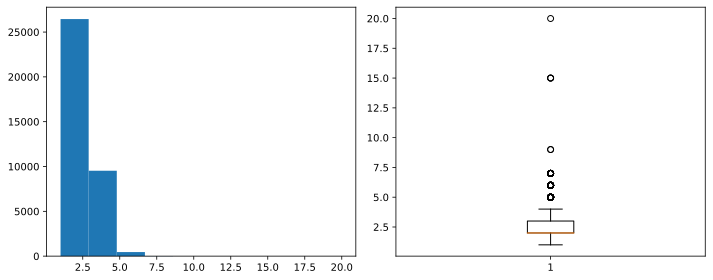

In [164]:
plot_stats('CNT_FAM_MEMBERS')

Os clientes tem de 1 a 20 familiares; <br>
A média é de 2 familiares

#### Variável MONTHS_BALANCE (data de atualização do score)<br>
O mês que os dados foram extraidos é o ponto de start, onde 0 é o mês atual, -1 mês passando, e assim por diante

## Análise multivariada

In [165]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,IDADE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,FLAG_EMPREGADO
0,5008804,M,Y,Y,0.00000,186685.73666,Working,Higher education,Civil marriage,Rented apartment,32.89041,-4542,1,1,0,0,NaN,2.00000,0,C,1
1,5008805,M,Y,Y,0.00000,186685.73666,Working,Higher education,Civil marriage,Rented apartment,32.89041,-4542,1,1,0,0,NaN,2.00000,0,C,1
2,5008806,M,Y,Y,0.00000,112500.00000,Working,Secondary / secondary special,Married,House / apartment,58.83288,-1134,1,0,0,0,Security staff,2.00000,0,C,1
3,5008808,F,N,Y,0.00000,270000.00000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.35616,-3051,1,0,1,1,Sales staff,1.00000,0,0,1
4,5008809,F,N,Y,0.00000,270000.00000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.35616,-3051,1,0,1,1,Sales staff,1.00000,-22,X,1


In [166]:
# Funções úteis
def plota_barplot1(pivot, x, y, titulo, palette=None, money=False, figsize=None):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.title(titulo, loc='left')
    g=sns.barplot(x=pivot[x], y=pivot[y], palette=palette)
    rects = ax.patches
    y = pivot[y]
    if money == True:
      for rect_x, rect_y in zip(rects, y):
        ax.text(rect_x.get_x() + rect_x.get_width() / 4.3, rect_y+1000, "${:,.2f}".format(rect_y))
    else:
      for rect_x, rect_y in zip(rects, y):
        ax.text(rect_x.get_x() + rect_x.get_width() / 4.3, rect_y+1000, "{:.2f}".format(rect_y))
    plt.tight_layout()
    plt.show()

def plota_scatter(data, x, y, titulo):
  fig, ax = plt.subplots()
  plt.title('Relação da renda média por idade', loc='left')
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  sns.scatterplot(data=renda_idade, x='IDADE', y='AMT_INCOME_TOTAL')
  plt.tight_layout()
  return plt.show()

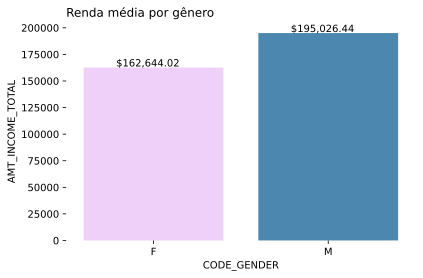

In [167]:
renda_gender = df.pivot_table(index='CODE_GENDER', values='AMT_INCOME_TOTAL', aggfunc='mean').reset_index()
plota_barplot1(renda_gender, 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'Renda média por gênero', palette=['#F1C9FF', '#3A8AC0'],money=True)

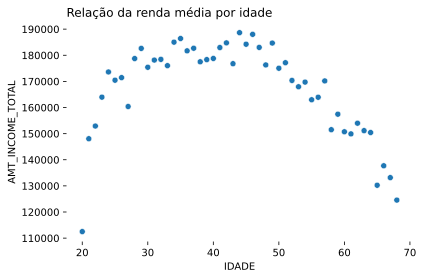

In [168]:
df['IDADE'] = df.IDADE.astype('int')
renda_idade = df.pivot_table(index='IDADE', values='AMT_INCOME_TOTAL', aggfunc='mean').reset_index().sort_values(by='AMT_INCOME_TOTAL')
plota_scatter(renda_idade, 'IDADE', 'AMT_INCOME', 'Relação renda média por idade')

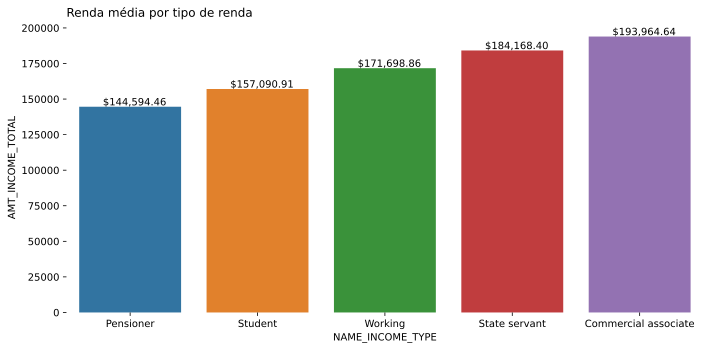

In [169]:
renda_tipo_renda = df.pivot_table(index='NAME_INCOME_TYPE', values='AMT_INCOME_TOTAL', aggfunc='mean').reset_index().sort_values(by='AMT_INCOME_TOTAL')
plota_barplot1(renda_tipo_renda, 'NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL', 'Renda média por tipo de renda', money=True, figsize=(10, 5))

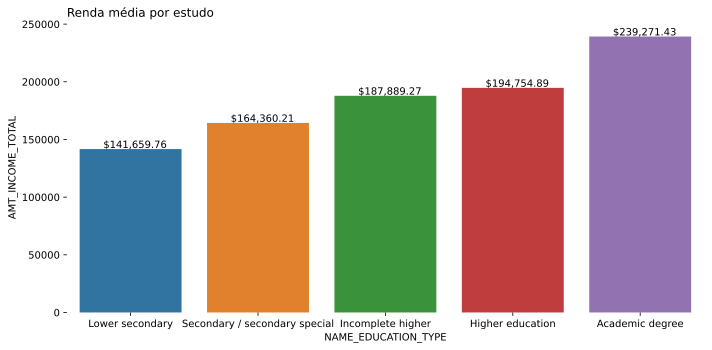

In [170]:
renda_estudo = df.pivot_table(index='NAME_EDUCATION_TYPE', values='AMT_INCOME_TOTAL', aggfunc='mean').reset_index().sort_values(by='AMT_INCOME_TOTAL')
plota_barplot1(renda_estudo, 'NAME_EDUCATION_TYPE', 'AMT_INCOME_TOTAL', 'Renda média por estudo', money=True, figsize=(10, 5))

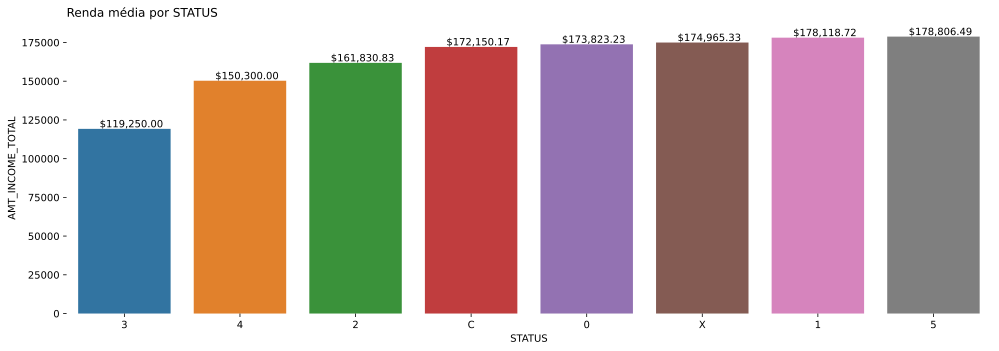

In [171]:
renda_status = df.pivot_table(index='STATUS', values='AMT_INCOME_TOTAL', aggfunc='mean').reset_index().sort_values(by='AMT_INCOME_TOTAL')
plota_barplot1(renda_status, 'STATUS', 'AMT_INCOME_TOTAL', 'Renda média por STATUS', money=True, figsize=(14, 5))

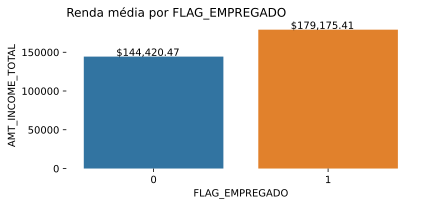

In [172]:
renda_empregado = df.pivot_table(index='FLAG_EMPREGADO', values='AMT_INCOME_TOTAL', aggfunc='mean').reset_index().sort_values(by='AMT_INCOME_TOTAL')
plota_barplot1(renda_empregado, 'FLAG_EMPREGADO', 'AMT_INCOME_TOTAL', 'Renda média por FLAG_EMPREGADO', money=True, figsize=(6, 3))

In [173]:
idade_status = df.pivot_table(index=['IDADE', 'STATUS'], values='AMT_INCOME_TOTAL', aggfunc='count').reset_index().sort_values(
    by='AMT_INCOME_TOTAL', ascending=False)
idade_status.rename(columns={'AMT_INCOME_TOTAL': 'COUNT'}, inplace=True)
idade_status['percent'] = idade_status.COUNT / idade_status.COUNT.sum()
idade_status.sort_values(by='percent', ascending=False)

,IDADE,STATUS,COUNT,percent
37,28,C,604,0.01657
94,39,C,575,0.01577
30,27,C,574,0.01574
100,40,C,555,0.01522
63,33,C,546,0.01498
...,...,...,...,...
129,46,5,1,0.00003
22,26,4,1,0.00003
124,45,5,1,0.00003
194,59,3,1,0.00003


In [174]:
idade_status['percent'].sum()

0.9999999999999999

In [175]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'IDADE', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS',
       'FLAG_EMPREGADO'],
      dtype='object')

No handles with labels found to put in legend.


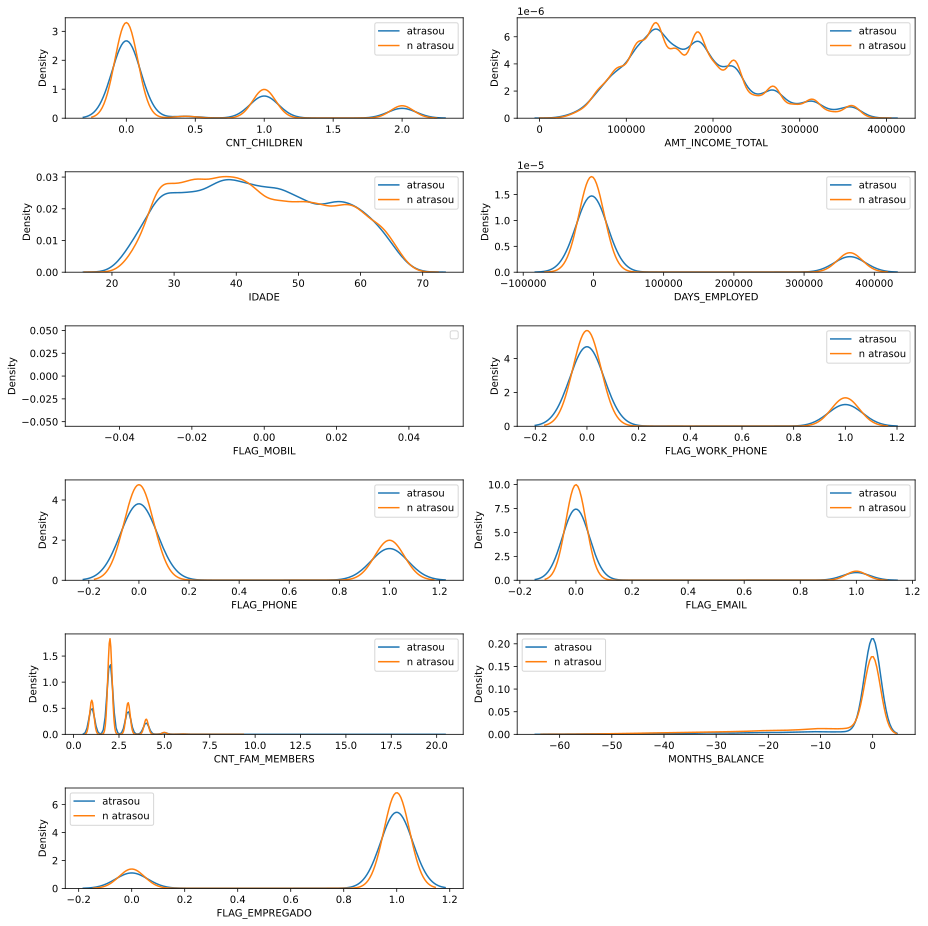

In [176]:
# Distribuiçao de cada coluna para a variável target
#df.drop('FLAG_MOBIL', axis=1, inplace=True)
def plota_dist(df):
  com_atraso = df.query('STATUS not in ["X", "C"]')
  cols_atraso = df.select_dtypes(include='number').iloc[:, 1:].columns
  sem_atraso = df.query('STATUS in ["X", "C"]')
  cols_satraso = df.select_dtypes(include='number').iloc[:, 1:].columns
  fig, ax = plt.subplots(nrows=5, ncols = 2, figsize=(13, 13))
  i=0
  for col in cols_atraso:
    i += 1
    plt.subplot(6, 2, i)
    sns.kdeplot(com_atraso[col], label='atrasou')
    sns.kdeplot(sem_atraso[col], label='n atrasou')
    plt.legend()
  plt.tight_layout()
  plt.show()
plota_dist(df)

# Preparação dos dados

In [246]:
df_raw = df.copy()
df_raw.columns = df_raw.columns.str.lower()

In [265]:
X_treino, X_validacao, y_treino, y_validacao = train_test_split(df_raw.drop('status', axis=1), df_raw.status, test_size=.3)
X_valida, X_teste, y_valida, y_test = train_test_split(X_validacao, y_validacao, test_size=.1)

In [266]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [267]:
cats = 'code_gender'
cat_transformer = LabelEncoder()

In [268]:
preprocessor = ColumnTransformer(
    transformers = ['Categóricas', cat_transformer, cats]
)

In [269]:
model = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier())])

In [270]:
X_treino = X_treino.loc[:, 'code_gender']

In [271]:
model.fit(X_treino, y_treino)

TypeError: ignored

In [245]:
X_treino

31707    42
28455    35
2595     55
2913     38
28112    39
         ..
15043    32
25133    48
22466    28
30064    32
18401    31
Name: idade, Length: 25519, dtype: int64